In [102]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import plotly.graph_objects as go

import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, RobustScaler

sba_cleaned = pd.read_csv("sba_cleaned.csv")

sba_cleaned.reset_index(inplace = True, drop = True)

The first thing that I want to do here is to do a bit of quantitative and qualitative  exploration of the variables in a very superficial sense, in particular, I'm interested in the distributions and characterizations of the individual variables, as well as how they relate to the eventual outcomes of the loans, stored in ```MIS_Status```.

In [103]:
# What are my features?

sba_cleaned.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0.1',
 'State',
 'Bank',
 'BankState',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv',
 'Approval_Year',
 'Approval_Month',
 'Approval_Day',
 'Disbursement_Year',
 'Disbursement_Month',
 'Disbursement_Day',
 'Disbursement_Delay',
 'State_Match',
 'Default_Delay',
 'Bank_Size',
 'ChgOff_Year',
 'ChgOff_Month',
 'ChgOff_Day',
 'is_franchise',
 'real_estate',
 'pct_guaranteed',
 'disb_my',
 'temp',
 'end_month',
 'end_year',
 'end_my',
 'is_recession']

OK, so the first two of these are garbage, so I'm going to get rid of them right off the bat.

In [104]:
sba_cleaned = sba_cleaned[sba_cleaned.columns.tolist()[2:]]
sba_cleaned.columns.tolist()

['State',
 'Bank',
 'BankState',
 'NAICS',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv',
 'Approval_Year',
 'Approval_Month',
 'Approval_Day',
 'Disbursement_Year',
 'Disbursement_Month',
 'Disbursement_Day',
 'Disbursement_Delay',
 'State_Match',
 'Default_Delay',
 'Bank_Size',
 'ChgOff_Year',
 'ChgOff_Month',
 'ChgOff_Day',
 'is_franchise',
 'real_estate',
 'pct_guaranteed',
 'disb_my',
 'temp',
 'end_month',
 'end_year',
 'end_my',
 'is_recession']

Now, starting at the top of this list of features, I'm going to produce comparison dataframes to allow me to compare the cases where the loans are paid off to those where the loans are not. For the quantitative cases this can be done directly, while for the categorical variables I'll have to turn this into percentages. 

# Locations


In [105]:
# Location of borrower

df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['State'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['State'].value_counts())

df = pd.DataFrame(sba_cleaned['State'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
FL,0.741771,0.258229,39128
DC,0.763124,0.236876,1562
GA,0.772098,0.227902,21382
NV,0.773468,0.226532,7734
IL,0.773908,0.226092,28630
MI,0.774688,0.225312,19848
TN,0.793389,0.206611,9046
AZ,0.795584,0.204416,16985
NJ,0.804146,0.195854,22915
NY,0.804522,0.195478,55546


In [106]:
# Location of Bank

df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['BankState'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['BankState'].value_counts())

df = pd.DataFrame(sba_cleaned['BankState'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
VA,0.614175,0.385825,28614
NC,0.743665,0.256335,72183
DE,0.753117,0.246883,22618
IL,0.774546,0.225454,64013
PR,0.777778,0.222222,153
CA,0.782006,0.217994,115471
RI,0.791400,0.208600,41697
SD,0.815553,0.184447,49201
OR,0.825913,0.174087,10983
NY,0.833117,0.166883,38512


In [107]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['State_Match'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['State_Match'].value_counts())

df = pd.DataFrame(sba_cleaned['State_Match'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
False,0.751081,0.248919,404168
True,0.895482,0.104518,460981


# Bank Information

In [108]:
# Name of Bank

df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Bank'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Bank'].value_counts())

df = pd.DataFrame(sba_cleaned['Bank'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df = df.loc[df['Overall'] >= 100]
df.sort_values('Paid')

,Paid,ChargedOff,Overall
CAPITAL ONE BK (USA) NATL ASSO,0.133028,0.866972,436
"M&I, A BRANCH OF",0.222628,0.777372,274
"SUPERIOR FINANCIAL GROUP, LLC",0.259921,0.740079,4032
"HARRIS N.A., A BRANCH OF",0.396226,0.603774,106
FEDERAL DEPOSIT INSUR CORP,0.407216,0.592784,194
...,...,...,...
BUSINESS FINAN CORP OF ST. LOU,1.000000,NaN,385
PIKES PEAK REGIONAL DEVEL CORP,1.000000,NaN,202
BUSINESS DEVEL FINAN CORP,1.000000,NaN,892
NORTHWEST BUS. DEVEL ASSOC,1.000000,NaN,470


In [109]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Bank_Size'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Bank_Size'].describe())

df = pd.DataFrame(sba_cleaned['Bank_Size'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,20135.354944,28101.049561,21505.273697
std,27826.332450,28956.738054,28184.718757
min,1.000000,1.000000,1.000000
25%,508.000000,3752.000000,568.000000
50%,5216.000000,22248.000000,6425.000000
75%,35054.000000,48167.000000,35143.000000
max,86853.000000,86853.000000,86853.000000


# Type of Business

In [110]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['NAICS'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['NAICS'].value_counts())

df = pd.DataFrame(sba_cleaned['NAICS'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
53,0.719348,0.280652,13066
52,0.722510,0.277490,9067
48,0.737748,0.262252,19344
51,0.756975,0.243025,10896
61,0.763063,0.236937,6124
45,0.770472,0.229528,40727
23,0.771542,0.228458,63482
56,0.774440,0.225560,30892
49,0.777936,0.222064,2112
44,0.779471,0.220529,81699


In [111]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['FranchiseCode'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['FranchiseCode'].value_counts())

df = pd.DataFrame(sba_cleaned['FranchiseCode'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
print("There are ", len(df), "total franchise codes.")
df = df.loc[df['Overall'] >= 100]
df.sort_values('Paid')

There are  2744 total franchise codes.


,Paid,ChargedOff,Overall
65140,0.492228,0.507772,193
63810,0.551724,0.448276,116
39598,0.648438,0.351562,128
0,0.664214,0.335786,197033
17998,0.675585,0.324415,598
...,...,...,...
21425,0.981928,0.018072,166
5725,0.986111,0.013889,144
38605,0.990654,0.009346,321
36680,0.993789,0.006211,161


In [112]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['NewExist'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['NewExist'].value_counts())

df = pd.DataFrame(sba_cleaned['NewExist'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
2.0,0.815945,0.184055,244454
1.0,0.832779,0.167221,620695


In [113]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['UrbanRural'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['UrbanRural'].value_counts())

df = pd.DataFrame(sba_cleaned['UrbanRural'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
1,0.761331,0.238669,450625
2,0.814502,0.185498,101796
0,0.928523,0.071477,312728


In [114]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['RevLineCr'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['RevLineCr'].value_counts())

df = pd.DataFrame(sba_cleaned['RevLineCr'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
Y,0.743263,0.256737,197389
0,0.850573,0.149427,256380
N,0.854638,0.145362,411380


In [115]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['is_franchise'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['is_franchise'].value_counts())

df = pd.DataFrame(sba_cleaned['is_franchise'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
False,0.826782,0.173218,814481
True,0.847971,0.152029,50668


# Loan information

In [116]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Term'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Term'].describe())

df = pd.DataFrame(sba_cleaned['Term'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,122.898977,57.386965,111.632397
std,79.873933,47.178942,79.225062
min,0.000000,0.000000,0.000000
25%,78.000000,29.000000,60.000000
50%,84.000000,49.000000,84.000000
75%,180.000000,69.000000,120.000000
max,569.000000,461.000000,569.000000


In [117]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['DisbursementGross'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['DisbursementGross'].describe())

df = pd.DataFrame(sba_cleaned['DisbursementGross'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,7.163630e+05,1.487860e+05,8.651490e+05
mean,2.177821e+05,1.356860e+05,2.036635e+05
std,2.996630e+05,2.156519e+05,2.886387e+05
min,4.000000e+03,4.000000e+03,4.000000e+03
25%,4.999700e+04,2.896850e+04,4.400000e+04
50%,1.012000e+05,6.386350e+04,1.000000e+05
75%,2.600000e+05,1.452985e+05,2.414360e+05
max,1.144632e+07,4.362157e+06,1.144632e+07


In [118]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['GrAppv'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['GrAppv'].describe())

df = pd.DataFrame(sba_cleaned['GrAppv'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,7.163630e+05,1.487860e+05,8.651490e+05
mean,2.105744e+05,1.227038e+05,1.954626e+05
std,2.946200e+05,2.164508e+05,2.846575e+05
min,1.000000e+03,1.000000e+03,1.000000e+03
25%,4.000000e+04,2.500000e+04,3.500000e+04
50%,1.000000e+05,5.000000e+04,9.450000e+04
75%,2.500000e+05,1.120000e+05,2.300000e+05
max,5.000000e+06,3.500000e+06,5.000000e+06


In [119]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['SBA_Appv'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['SBA_Appv'].describe())

df = pd.DataFrame(sba_cleaned['SBA_Appv'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,7.163630e+05,1.487860e+05,8.651490e+05
mean,1.651970e+05,8.707122e+04,1.517612e+05
std,2.389307e+05,1.594952e+05,2.291595e+05
min,5.000000e+02,5.000000e+02,5.000000e+02
25%,2.500000e+04,1.250000e+04,2.250000e+04
50%,7.520000e+04,2.500000e+04,6.375000e+04
75%,1.987500e+05,8.500000e+04,1.779260e+05
max,4.500000e+06,3.411950e+06,4.500000e+06


In [120]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['LowDoc'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['LowDoc'].value_counts())

df = pd.DataFrame(sba_cleaned['LowDoc'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
N,0.816590,0.183410,757602
Y,0.908561,0.091439,107547


In [121]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['pct_guaranteed'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['pct_guaranteed'].describe())

df = pd.DataFrame(sba_cleaned['pct_guaranteed'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,0.710505,0.585366,0.688984
std,0.336618,0.375217,0.346795
min,0.027291,0.039347,0.027291
25%,0.500000,0.350279,0.500000
50%,0.750000,0.500000,0.750000
75%,0.850000,0.850000,0.850000
max,71.605971,97.484286,97.484286


In [122]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['real_estate'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['real_estate'].value_counts())

df = pd.DataFrame(sba_cleaned['real_estate'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
False,0.795594,0.204406,715905
True,0.983577,0.016423,149244


# Business by Numbers

In [123]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['NoEmp'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['NoEmp'].describe())

df = pd.DataFrame(sba_cleaned['NoEmp'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,12.355018,7.259722,11.478743
std,76.961678,61.881258,74.610349
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000
50%,5.000000,3.000000,4.000000
75%,11.000000,7.000000,10.000000
max,9999.000000,9999.000000,9999.000000


In [124]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['CreateJob'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['CreateJob'].describe())

df = pd.DataFrame(sba_cleaned['CreateJob'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,7.237930,15.022536,8.576705
std,211.900564,341.326095,239.215840
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000
max,8800.000000,8800.000000,8800.000000


In [125]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['RetainedJob'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['RetainedJob'].describe())

df = pd.DataFrame(sba_cleaned['RetainedJob'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,9.552230,17.595863,10.935552
std,212.429195,341.638812,239.681598
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000
75%,4.000000,5.000000,4.000000
max,9500.000000,8800.000000,9500.000000


# All the dates

In [126]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Approval_Year'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Approval_Year'].value_counts())

df = pd.DataFrame(sba_cleaned['Approval_Year'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
1970,0.055556,0.944444,18
1971,0.142857,0.857143,14
1972,0.139535,0.860465,43
1973,0.023810,0.976190,42
1974,0.096774,0.903226,31
1975,0.021277,0.978723,47
1976,0.074074,0.925926,81
1977,0.080292,0.919708,137
1978,0.034091,0.965909,264
1979,0.046377,0.953623,345


In [127]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Approval_Month'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Approval_Month'].value_counts())

df = pd.DataFrame(sba_cleaned['Approval_Month'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
1,0.827271,0.172729,64633
2,0.815540,0.184460,61699
3,0.823139,0.176861,79209
4,0.833816,0.166184,77691
5,0.830944,0.169056,74721
6,0.829541,0.170459,75819
7,0.835875,0.164125,74102
8,0.825887,0.174113,76278
9,0.839707,0.160293,80353
10,0.821040,0.178960,67367


In [128]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Approval_Day'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Approval_Day'].value_counts())

df = pd.DataFrame(sba_cleaned['Approval_Day'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
1,0.821917,0.178083,22658
2,0.819477,0.180523,25908
3,0.829439,0.170561,25891
4,0.827518,0.172482,25249
5,0.823265,0.176735,26056
6,0.825726,0.174274,27910
7,0.827674,0.172326,29392
8,0.828829,0.171171,28638
9,0.828217,0.171783,28961
10,0.826645,0.173355,27983


In [129]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Disbursement_Year'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Disbursement_Year'].value_counts())

df = pd.DataFrame(sba_cleaned['Disbursement_Year'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
1970.0,0.076923,0.923077,13
1971.0,0.066667,0.933333,15
1972.0,0.171429,0.828571,35
1973.0,0.023256,0.976744,43
1974.0,0.121212,0.878788,33
1975.0,0.022222,0.977778,45
1976.0,0.046154,0.953846,65
1977.0,0.085938,0.914062,128
1978.0,0.036885,0.963115,244
1979.0,0.048485,0.951515,330


In [130]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Disbursement_Month'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Disbursement_Month'].value_counts())

df = pd.DataFrame(sba_cleaned['Disbursement_Month'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
1.0,0.870105,0.129895,92667
2.0,0.796338,0.203662,55101
3.0,0.794630,0.205370,61791
4.0,0.861904,0.138096,100068
5.0,0.798785,0.201215,60895
6.0,0.806564,0.193436,60180
7.0,0.866601,0.133399,95293
8.0,0.786292,0.213708,58608
9.0,0.812799,0.187201,62772
10.0,0.856246,0.143754,99225


In [131]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Disbursement_Day'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Disbursement_Day'].value_counts())

df = pd.DataFrame(sba_cleaned['Disbursement_Day'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
1.0,0.916387,0.083613,25654
2.0,0.747943,0.252057,1337
3.0,0.763608,0.236392,1286
4.0,0.826486,0.173514,1850
5.0,0.845026,0.154974,1910
6.0,0.832367,0.167633,1897
7.0,0.836641,0.163359,1965
8.0,0.829626,0.170374,1978
9.0,0.837624,0.162376,2020
10.0,0.898817,0.101183,3380


In [132]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['Disbursement_Delay'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['Disbursement_Delay'].describe())

df = pd.DataFrame(sba_cleaned['Disbursement_Delay'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,121.133358,63.730895,111.261437
std,169.721856,98.014490,161.161337
min,0.000000,0.000000,0.000000
25%,34.000000,21.000000,31.000000
50%,66.000000,36.000000,59.000000
75%,131.000000,67.000000,119.000000
max,1825.000000,1808.000000,1825.000000


In [133]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['disb_my'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['disb_my'].describe())

df = pd.DataFrame(sba_cleaned['disb_my'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,374.015114,409.474447,380.113315
std,68.904586,68.037155,70.046114
min,7.000000,2.000000,2.000000
25%,321.000000,399.000000,329.000000
50%,383.000000,432.000000,396.000000
75%,428.000000,449.000000,435.000000
max,535.000000,530.000000,535.000000


In [134]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['end_month'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['end_month'].value_counts())

df = pd.DataFrame(sba_cleaned['end_month'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
0.0,0.800864,0.199136,62500
1.0,0.864455,0.135545,90398
2.0,0.785008,0.214992,58016
3.0,0.804601,0.195399,62943
4.0,0.868197,0.131803,96629
5.0,0.800708,0.199292,62436
6.0,0.801696,0.198304,62636
7.0,0.865820,0.134180,91929
8.0,0.791246,0.208754,60042
9.0,0.807313,0.192687,64353


In [135]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['end_year'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['end_year'].value_counts())

df = pd.DataFrame(sba_cleaned['end_year'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
pd.options.display.max_rows = 100

df

,Paid,ChargedOff,Overall
1973.0,NaN,1.000000,1
1974.0,NaN,1.000000,1
1975.0,NaN,1.000000,4
1976.0,NaN,1.000000,2
1977.0,0.250000,0.750000,4
1978.0,0.181818,0.818182,11
1979.0,0.066667,0.933333,15
1980.0,0.066667,0.933333,30
1981.0,0.043478,0.956522,46
1982.0,0.062500,0.937500,80


In [136]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F']['end_my'].describe())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F']['end_my'].describe())

df = pd.DataFrame(sba_cleaned['end_my'].describe())

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df

,Paid,ChargedOff,Overall
count,716363.000000,148786.000000,865149.000000
mean,496.914091,466.861412,491.745712
std,92.114842,72.822332,89.813742
min,91.000000,47.000000,47.000000
25%,433.000000,439.000000,435.000000
50%,497.000000,476.000000,492.000000
75%,545.000000,507.000000,537.000000
max,959.000000,787.000000,959.000000


In [137]:
df0 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] == 'P I F'
                                  ]['is_recession'].value_counts())
df1 = pd.DataFrame(sba_cleaned.loc[sba_cleaned['MIS_Status'] != 'P I F'
                                  ]['is_recession'].value_counts())

df = pd.DataFrame(sba_cleaned['is_recession'].value_counts())

df0 = df0/df
df1 = df1/df
#df = df/sum(df['State'])

df = pd.concat([df0, df1, df], axis = 1)
df.columns = ['Paid', 'ChargedOff', 'Overall']
df.sort_values('Paid')

,Paid,ChargedOff,Overall
True,0.826899,0.173101,325769
False,0.828701,0.171299,539380


We can now, roughly speaking, divide these variables into two categories: those for which the failed and paid off loans have substantially different distributions, and those for which they do not. For some of the variables in the second category, it is possible that they may have an influence when combined with other variables, but as individual variables, they have little influence.

## Influence of Variables

- Location
    - ```State``` (of business) : Failure rates here range from more than 25% (for loans for businesses based in Florida) to less than 7% (for loans for businesses based in Wyoming or Montana).
    - ```BankState``` : Failure rates here range from nearly 40% (for loans made by Virginia based banks) to less than 7% (for loans made by banks based in Wyoming, Vermont, New Hampshire, or Montana).
    - ```StateMatch``` : When the borrower and lender are in the same state, roughly 10% of loans fail. When they are in different states, that failure rate rises to nearly 25% of loans
    
- Bank Information
    - ```Bank``` : The lending bank has a significant influence on the outcome of the loan, suggesting that some banks may use looser requirements when deciding whether or not to make a loan. Loan payoff rates range from a less than 20% all the way up to 100%, even when we control for very small banks by eliminating those with fewer than 100 loans extended.
    - ```BankSize``` : Loans that are charged off are made by bigger banks (i.e. banks that make more loans) on the whole than paid off loans are. The median number of loans made by banks that made paid off loans is 5216 loans while that for charged off loans is 22248 loans.
    
- Type of Business
    - ```NAICS``` : Loan default rates range from a high of more than 27% for categories 52 (finance) and 53 (real estate) to less than 10% for categories 11 (agriculture), 21 (mining), and 55 (company management). Businesses for which an NAICS category is unspecified also have a default rate of less than 10%.
    - ```FranchiseCode``` : While there is significant variation in default rate from one franchise type to another, the large number of total franchise codes (2700+) and the fact that they are assigned alphabetically rather than by type of company means that this variable would need to be treated as a categorical variable and one hot encoded in order to be useful. 
    - ```NewExist``` : Existing businesses (code = 1) paid off a slightly higher percentage of their loans than new businesses (code = 2) at 83.3% versus 81.6%.
    - ```UrbanRural``` : Urban businesses (code = 1) default at a higher rate than rural businesses (code = 2) at 23.9% vs 18.9%. Businesses for which the location type is unspecified (code = 0) default at a rate of only 7.1%, substantially lower than either.
    - ```RevLineCr``` : Businesses that have a revolving line of credit default at significantly higher rates (25.7%) than those that do not or those for which the existance of such a credit line is unspecified (around 15%)
    - ```is_franchise``` : Non franchises seem to default at slightly higher rates than franchises (17.3% vs 15.2%)

- Loan Information
    - ```Term```: On average, paid off loans had longer terms (a median of 84 months) than did defaulted loans (a median of 49 months).
    - ```DisbursementGross``` : Paid off loans tended to be larger (with a mean of 217782 dollars) than defaulted loans (with a mean of 135686 dollars). Similarly, paid of loans tended to have been approved for larger amounts (```GrAppv```) and guaranteed for larger amounts (```SBA_Appv```). These three variables are all fairly tightly related.
    - ```LowDoc``` : Low document loans had substantially lower default rates (at 9.1%) than did those that were not low document (at 18.3%). 
    - ```pct_guaranteed``` : Loans that were paid in full had on average 71.1% of their capital guaranteed by the SBA, while loans that went into default had only 58.5% of their capital guaranteed on average.
    - ```real_estate``` : Loans that seem likely to have been backed by real estate (those with terms equal to or exceeding 20 years) have a default rate of less than 2% while those that do not have a default rate of slightly more than 20%.

- Business by Numbers
    - ```NoEmp``` : Loans that were paid in full tended to be given to larger businesses, with a mean size of 12.4 employees versus 7.3 employees for those businesses whose loans went to default.
    - ```CreateJob``` : Loans that were paid in full were taken out to create fewer jobs (1 at the 75th percentile) than those that went into default (2 at the 75th percentile). Note that most loans (regardless of outcome) were not taken out to create new jobs.
    - ```RetainedJob``` : Loans that were paid in full were taken out to retain fewer jobs (median 0 jobs, 75th percentile 4 jobs) than those that went into default (median 2 jobs, 75th percentile 5 jobs).

- All the Dates
    - ```Approval_Year``` : Looking at percentage of defaulted loans by approval year, we see that during the first 10 years of our data, small business loans were few and had high default rates (in excess of 85%). Over the next decade, there are more loans and the default rates drop to 30-40%. For the loans approved the following decade, the default rate falls below 10% before creeping back up to a high of 44% in 2007. Default rates since then have been steadily decreasing.
    - ```Approval_Month``` and ```Approval_Day``` : While both of these show some variation in default rates, it is fairly minimal.
    - ```Disbursement_Year``` : This (not surprisingly) tracks with ```Approval_Year``` as far as loan defaults go.
    - ```Disbursement_Month``` : Interestingly, unlike ```Approval_Month```, there seem to be significant differences in default rate depending on the month in which the loan money was disbursed. Loans that were disbursed at the beginning of the quarter (January, April, July, or October) had default rates around 13-14%, whicl those disbursed in other months had default rates of closer to 20% 
    - ```Disbursement_Day``` : Once again, unlike ```Approval_Day```, there seem to be signifcant differences in default rate depending on the day of the month when the loan money was disbursed. A substantial majority of loans (80%) were disbursed on the last day of the month, and these have default rates similar to (those slightly higher than) the overall default rate. For the remaining 20% of loans, being disbursed the 2nd, 3rd, or 18th through 29th of the month was associated with significantly higher rates of default than average. Being disbursed the 10th through the 17th was associated with significantly lower rates of default.
    - ```Disbursement_Delay``` : Paid off loans have a median delay between approval and disbursement of 66 days, or slightly more than 2 months. Defaulted loans have a median delay of only 36 days. 
    - ```disb_my``` : Defaulted loans tend to have originated later, on the whole than paid off loans, but this almost certainly masks a great deal of information and nuance within the data. 
    - ```end_month``` : We see similar patterns here to those seem in ```Disbursement_Month```, which is to say that those loans scheduled to terminate at the beginning of a quarter are paid off at much higher rates than are other loans.
    - ```end_year``` : We see here that loans that were scheduled to terminate early in the time period for which we have data have extremely high default rates, which begin to fall for loans ending in 1989 or so. We see a spike for loans scheduled to terminate in the late 2000s, and then a fall in default rates after that.
    - ```end_my``` : Paid off loans tend to have later end dates than defaulted loans. This is the opposite of what we see with ```disb_my```, and once again probably masks nuance within the data.
    - ```is_recession``` : Whether or not a loan term overlaps the Great Recession appears to have virtually no impact on whether or not it went into default, though it is possible that a disproportionate percentage of loans that did default did so during the recession.
    
As we can see from looking at this data, the majority of these variables show some influence in terms of whether or not a loan goes into default.

## Questions for our model

There are actually multiple obvious questions to try to answer with models based on this data. Among others we have
1. Given historical data, should a bank extend a small business loan?
2. Given historical data, should a bank _buy_ a small business loan that has been made by another bank?

We have, in theory, considerably more information available to answer the second question than we do to answer the first, and it is perhaps a question that is less likely to have been asked in this context (outside of decision making for an actual bank), so I think that this is the version of the question that I'm going to answer. 

### Some observations before continuing

1. This is, in a sense, time dependant data, which is to say that when determining whether or not a loan should be purchased, we should use only that data that would have been available at the point when the purchasing decision would have been made. This may be tricky, and should definitely be treated with care.
    1. There is no way of determining whether a paid off loan was paid off early, in other words, there is no payoff date in the data. We can assume that a paid off loan was paid off at the earlier of its end date and the point at which the data ended (December 2014)
    2. Loans that default can have charge off dates that are significantly later than their end dates. In other words, they may be in limbo, so to speak, even though their term is over.
2. The small number and high default rate of early small business loans suggests (to me) that at the beginning loans were taken only by those persons who could not raise funds in any other way, who perhaps had little or no safety net to fall back on in the case that their business failed. This begins to change in the 1980s, which suggests a change in the attitude of either banks lending to small business persons or, more likely, a change in the attitude of potential borrowers, or perhaps of their type of safety net. 


### Our question to answer

A loan of amount M and term T was made by a bank on a date D that was 3 months prior to today's date. The bank is interested in selling the loan. Assuming that it has not already gone into default, what is the probability that this particular loan goes into default? Given that, is it reasonable for our bank/company to purchase this loan?

### A few graphs

Obviously we can look at a lot of possible graphs here, but I'm going to try to restrict myself to just a handful of cases where it seems likely to be enlightening:
- ```Disbursement Delay```
- ```Disbursement Month``` vs ```Approval Month```
- ```State``` vs ```BankState```
- ```Bank_Size```
- ```Term``` vs ```Disbursement_Gross```



### Disbursement Month vs Approval Month

In [141]:
sba_months = sba_cleaned[['Approval_Month', 'Disbursement_Month', 'Disbursement_Delay', 'MIS_Status']].copy()

In [142]:
sba_months.head()

,Approval_Month,Disbursement_Month,Disbursement_Delay,MIS_Status
0,2,2.0,730.0,P I F
1,2,5.0,92.0,P I F
2,2,12.0,306.0,P I F
3,2,6.0,122.0,P I F
4,2,5.0,75.0,P I F


In [143]:
sba_months['Delay'] = sba_months['Disbursement_Delay']/30

In [144]:
sba_months['Delay'] = np.rint(sba_months['Delay'])

In [145]:
sba_months.head()

,Approval_Month,Disbursement_Month,Disbursement_Delay,MIS_Status,Delay
0,2,2.0,730.0,P I F,24.0
1,2,5.0,92.0,P I F,3.0
2,2,12.0,306.0,P I F,10.0
3,2,6.0,122.0,P I F,4.0
4,2,5.0,75.0,P I F,2.0


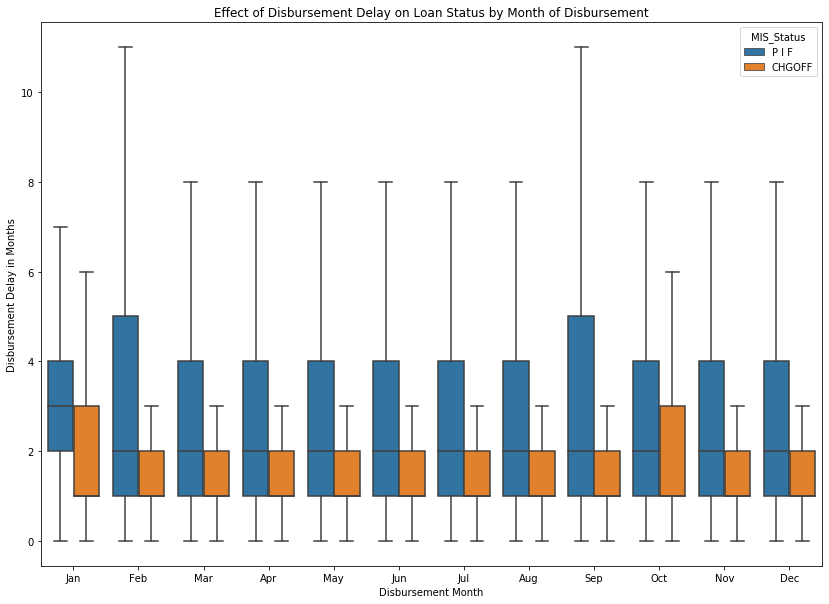

In [175]:
plt.figure(figsize = (14, 10))

sns.boxplot(x="Disbursement_Month", y="Delay", hue="MIS_Status", data=sba_months, showfliers = False)
plt.title("Effect of Disbursement Delay on Loan Status by Month of Disbursement")
plt.xlabel("Disbursement Month")
plt.ylabel("Disbursement Delay in Months")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
plt.close()

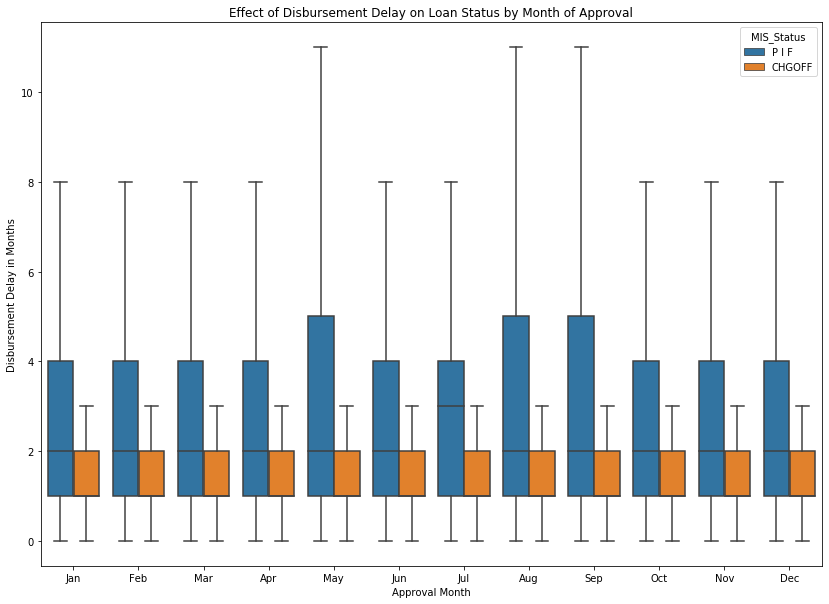

In [176]:
plt.figure(figsize = (14, 10))

sns.boxplot(x="Approval_Month", y="Delay", hue="MIS_Status", data=sba_months, showfliers = False)
plt.title("Effect of Disbursement Delay on Loan Status by Month of Approval")
plt.xlabel("Approval Month")
plt.ylabel("Disbursement Delay in Months")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
plt.close()

We see here that loans that end up being charged off are generally disbursed more quickly than those that are paid off. The is particularly true for loans disbursed in January.

### State vs BankState

In [148]:
sba_bank = sba_cleaned[['State', 'BankState', 'MIS_Status', 'State_Match']]
sba_bank.head()

,State,BankState,MIS_Status,State_Match
0,IN,OH,P I F,False
1,IN,IN,P I F,True
2,IN,IN,P I F,True
3,OK,OK,P I F,True
4,FL,FL,P I F,True


In [149]:
usa_centroids = pd.DataFrame(columns = ['State', 'long', 'lat'])

for index, row in usa.iterrows():
    state = row.STATE_ABBR
    long = row.geometry.centroid.x
    lat = row.geometry.centroid.y
    
    usa_centroids.loc[index] = [state, long, lat]

usa_centroids.head()

,State,long,lat
0,HI,-156.327109,20.240447
1,WA,-120.428027,47.376762
2,MT,-109.652534,47.032266
3,ME,-69.234280,45.389409
4,ND,-100.470755,47.446078


In [150]:
bank_state_info = []

for state in usa_centroids['State']:
    state_info = [state]
    for match in [True, False]:
        for status in ['P I F', 'CHGOFF']:
            state_info.append(len(sba_bank.loc[(sba_bank['BankState'] == state) & 
              (sba_bank['State_Match'] == match) & 
              (sba_bank['MIS_Status'] == status)]))
            
    bank_state_info.append(state_info)

In [151]:
bank_state_info = pd.DataFrame(bank_state_info,columns = ['State', 'InState Paid', 'InState Dft', 'OutState Paid', 'OutState Dft'])
bank_state_info.head()

,State,InState Paid,InState Dft,OutState Paid,OutState Dft
0,HI,2577,272,41,12
1,WA,8870,673,741,94
2,MT,7071,400,148,16
3,ME,3238,248,91,12
4,ND,4271,334,358,43


In [152]:
bank_state_info['Instate'] = bank_state_info['InState Paid'] + bank_state_info['InState Dft']
bank_state_info['Outstate'] = bank_state_info['OutState Paid'] + bank_state_info['OutState Dft']

bank_state_info['In pct'] = 100 * bank_state_info['InState Paid']/bank_state_info['Instate']
bank_state_info['Out pct'] = 100 * bank_state_info['OutState Paid']/bank_state_info['Outstate']

bank_state_info.head()

,State,InState Paid,InState Dft,OutState Paid,OutState Dft,Instate,Outstate,In pct,Out pct
0,HI,2577,272,41,12,2849,53,90.452790,77.358491
1,WA,8870,673,741,94,9543,835,92.947710,88.742515
2,MT,7071,400,148,16,7471,164,94.645964,90.243902
3,ME,3238,248,91,12,3486,103,92.885829,88.349515
4,ND,4271,334,358,43,4605,401,92.747014,89.276808


In [153]:
state_data = pd.merge(usa_centroids, bank_state_info, on = 'State' )
state_data.head()

,State,long,lat,InState Paid,InState Dft,OutState Paid,OutState Dft,Instate,Outstate,In pct,Out pct
0,HI,-156.327109,20.240447,2577,272,41,12,2849,53,90.452790,77.358491
1,WA,-120.428027,47.376762,8870,673,741,94,9543,835,92.947710,88.742515
2,MT,-109.652534,47.032266,7071,400,148,16,7471,164,94.645964,90.243902
3,ME,-69.234280,45.389409,3238,248,91,12,3486,103,92.885829,88.349515
4,ND,-100.470755,47.446078,4271,334,358,43,4605,401,92.747014,89.276808


In [154]:
state_data.describe()


,long,lat,InState Paid,InState Dft,OutState Paid,OutState Dft,Instate,Outstate,In pct,Out pct
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-93.488888,39.615814,8094.117647,944.725490,5949.784314,1971.980392,9038.843137,7921.764706,90.570025,82.563555
std,19.121057,6.350697,10033.538360,1464.519649,10799.430404,4121.522347,11475.402420,14684.824245,2.639487,10.756579
min,-156.327109,20.240447,174.000000,13.000000,10.000000,7.000000,187.000000,24.000000,84.012539,41.666667
25%,-103.009306,35.715343,3400.000000,293.000000,417.500000,51.500000,3751.500000,482.000000,89.024361,78.766232
50%,-89.664005,39.352016,4825.000000,500.000000,1442.000000,156.000000,5304.000000,1627.000000,90.455413,85.314685
75%,-79.126455,43.341737,8667.000000,929.000000,3979.000000,994.500000,9461.000000,4742.500000,92.600894,89.548584
max,-69.234280,64.317172,65529.000000,9377.000000,46355.000000,17560.000000,74906.000000,63915.000000,95.231144,95.356037


In [155]:
outstate_data = state_data[['State', 'long', 'lat', 'Outstate', 'Out pct']].copy()
outstate_data['Out pct'] = np.rint(outstate_data['Out pct'])
outstate_data.head()

,State,long,lat,Outstate,Out pct
0,HI,-156.327109,20.240447,53,77.0
1,WA,-120.428027,47.376762,835,89.0
2,MT,-109.652534,47.032266,164,90.0
3,ME,-69.234280,45.389409,103,88.0
4,ND,-100.470755,47.446078,401,89.0


In [157]:
outstate_data['text'] = outstate_data['State'] + '<br>Loans ' + (
    outstate_data['Outstate']).astype(str) + '<br> Percent Paid ' + (outstate_data['Out pct'].astype(str))
limits = [(0,50),(50,60),(60,70),(70,80),(80,90), (90, 100)]
colors = ["violet","red","darkorange","gold","lightgreen", "darkgreen"]
states = []
scale = 25

In [159]:
fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    outstate_data_sub = outstate_data.loc[(outstate_data['Out pct'] >= lim[0]) & (outstate_data['Out pct'] < lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = outstate_data_sub['long'],
        lat = outstate_data_sub['lat'],
        text = outstate_data_sub['text'],
        marker = dict(
            size = outstate_data_sub['Outstate']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Out of state small business loans : <br> Color indicates percent paid <br> Size indicates number of out of state loans',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()


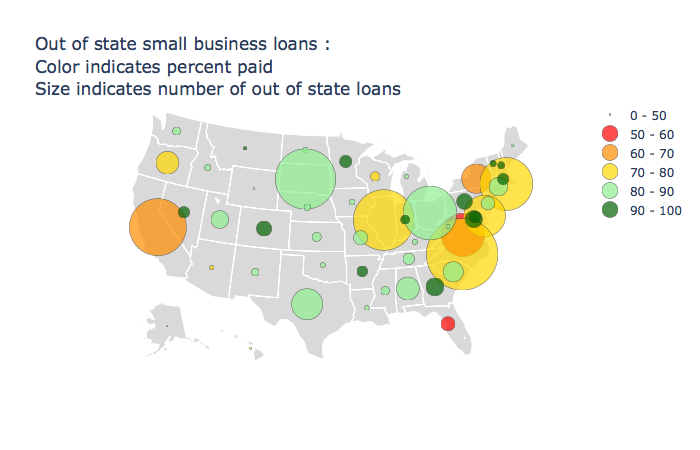

### Disbursement Delay


(array([1.06633e+05, 1.69111e+05, 1.31456e+05, 9.05380e+04, 7.20800e+04,
        5.61910e+04, 3.89830e+04, 2.87150e+04, 2.24430e+04, 1.76630e+04,
        1.43850e+04, 1.17830e+04, 9.93200e+03, 8.05200e+03, 7.41000e+03,
        6.41400e+03, 6.66600e+03, 5.16600e+03, 4.72300e+03, 4.55700e+03,
        4.64300e+03, 4.01500e+03, 3.73800e+03, 3.29600e+03, 3.16700e+03,
        2.52800e+03, 2.45200e+03, 1.99700e+03, 1.90500e+03, 1.69600e+03,
        1.48500e+03, 1.41200e+03, 1.26100e+03, 1.03800e+03, 1.06300e+03,
        9.49000e+02, 9.60000e+02, 8.14000e+02, 7.48000e+02, 7.27000e+02,
        8.14000e+02, 6.47000e+02, 5.67000e+02, 5.26000e+02, 5.53000e+02,
        4.27000e+02, 4.38000e+02, 3.91000e+02, 3.50000e+02, 3.08000e+02,
        2.67000e+02, 3.04000e+02, 2.77000e+02, 2.65000e+02, 2.32000e+02,
        2.08000e+02, 2.44000e+02, 2.00000e+02, 1.72000e+02, 1.96000e+02,
        7.08000e+02, 8.71000e+02, 3.43000e+02, 2.10000e+02, 2.08000e+02,
        1.43000e+02, 1.32000e+02, 1.37000e+02, 1.20

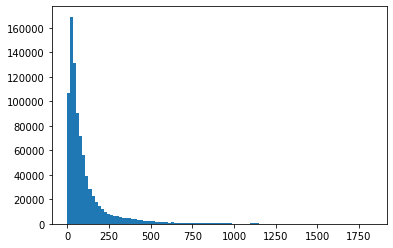

In [160]:
sba_delay = sba_cleaned[['Disbursement_Delay', 'MIS_Status']]

plt.hist(sba_delay['Disbursement_Delay'],  bins = 100)

In [161]:
sba_delay['Disbursement_Delay'].describe()

count    865149.000000
mean        111.261437
std         161.161337
min           0.000000
25%          31.000000
50%          59.000000
75%         119.000000
max        1825.000000
Name: Disbursement_Delay, dtype: float64

In [162]:
from collections import defaultdict

paid = defaultdict(int)
chf = defaultdict(int)

for i in range(len(sba_delay)):
    if sba_delay.loc[i, 'MIS_Status'] == 'P I F':
        paid[sba_delay.loc[i, 'Disbursement_Delay']] += 1
    else:
        chf[sba_delay.loc[i, 'Disbursement_Delay']] += 1

In [163]:
cles = set(set(chf.keys()) | set(paid.keys()))

delays = {}

for cle in cles:
    if cle not in paid.keys():
        delays[cle] = 0
    elif cle not in chf.keys():
        delays[cle] = 1
    else:
        delays[cle] = paid[cle]/(chf[cle]+paid[cle])
        
delays = pd.DataFrame.from_dict(delays, orient = 'index')
delays.reset_index(inplace = True)
delays.columns = ['Delay', 'Fraction_Paid']
delays.head()

,Delay,Fraction_Paid
0,0.0,0.840504
1,1.0,0.674419
2,2.0,0.641812
3,3.0,0.633007
4,4.0,0.659326


In [164]:
for i in range(len(delays)):
    
    cle = delays.loc[i, 'Delay']
    delays.loc[i, 'Count'] = paid[cle] + chf[cle]
    
delays.head()

,Delay,Fraction_Paid,Count
0,0.0,0.840504,14132.0
1,1.0,0.674419,1935.0
2,2.0,0.641812,2186.0
3,3.0,0.633007,2654.0
4,4.0,0.659326,2997.0


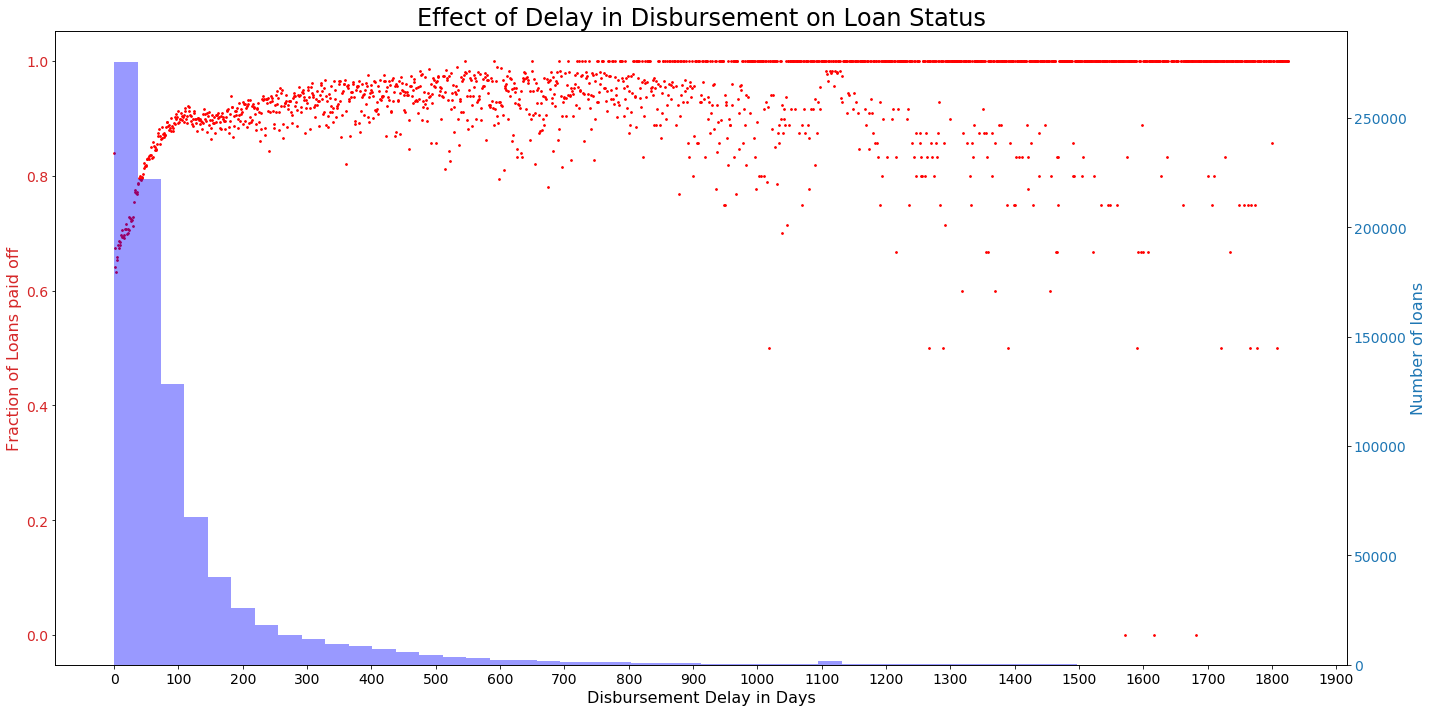

In [165]:
fig, ax1 = plt.subplots(figsize = (20, 10))

color = 'tab:red'
ax1.set_xlabel('Disbursement Delay in Days', fontsize = 16)
ax1.set_ylabel('Fraction of Loans paid off', color=color, fontsize = 16)
ax1.scatter(delays['Delay'], delays['Fraction_Paid'], s = 3, c = 'r')
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_locator(plt.MaxNLocator(25))
ax1.set_title("Effect of Delay in Disbursement on Loan Status", fontsize = 24)
ax1.tick_params(labelsize = 14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of loans', color=color, fontsize = 16)  # we already handled the x-label with ax1
sns.distplot(sba_delay['Disbursement_Delay'], kde = False, color = 'b')
ax2.tick_params(axis='y', labelcolor=color)
ax2.xaxis.set_major_locator(plt.MaxNLocator(25))
ax2.tick_params(labelsize = 14)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Bank Size


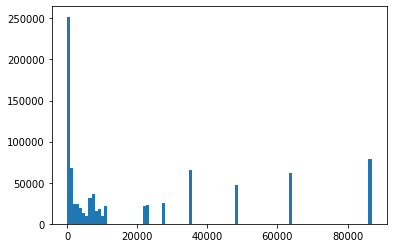

In [166]:
sba_bank = sba_cleaned[['Bank_Size', 'MIS_Status']]

plt.hist(sba_bank['Bank_Size'],  bins = 100)
plt.show()
plt.close()

In [167]:
paid = defaultdict(int)
chf = defaultdict(int)

for i in range(len(sba_bank)):
    if sba_bank.loc[i, 'MIS_Status'] == 'P I F':
        paid[sba_bank.loc[i, 'Bank_Size']] += 1
    else:
        chf[sba_bank.loc[i, 'Bank_Size']] += 1

In [168]:
cles = set(set(chf.keys()) | set(paid.keys()))

banks = {}

for cle in cles:

    if cle not in paid.keys():
        banks[cle] = 0
    elif cle not in chf.keys():
        banks[cle] = 1
    else:
        banks[cle] = paid[cle]/(chf[cle]+paid[cle])
        
banks = pd.DataFrame.from_dict(banks, orient = 'index')
banks.reset_index(inplace = True)
banks.columns = ['Bank', 'Fraction_Paid']
banks.head()

,Bank,Fraction_Paid
0,1.0,0.694260
1,2.0,0.791209
2,3.0,0.798918
3,4.0,0.830492
4,5.0,0.851439


In [169]:
for i in range(len(banks)):
    
    cle = banks.loc[i, 'Bank']
    banks.loc[i, 'Count'] = paid[cle] + chf[cle]
    
banks.head()

,Bank,Fraction_Paid,Count
0,1.0,0.694260,906.0
1,2.0,0.791209,1001.0
2,3.0,0.798918,1109.0
3,4.0,0.830492,1056.0
4,5.0,0.851439,1077.0


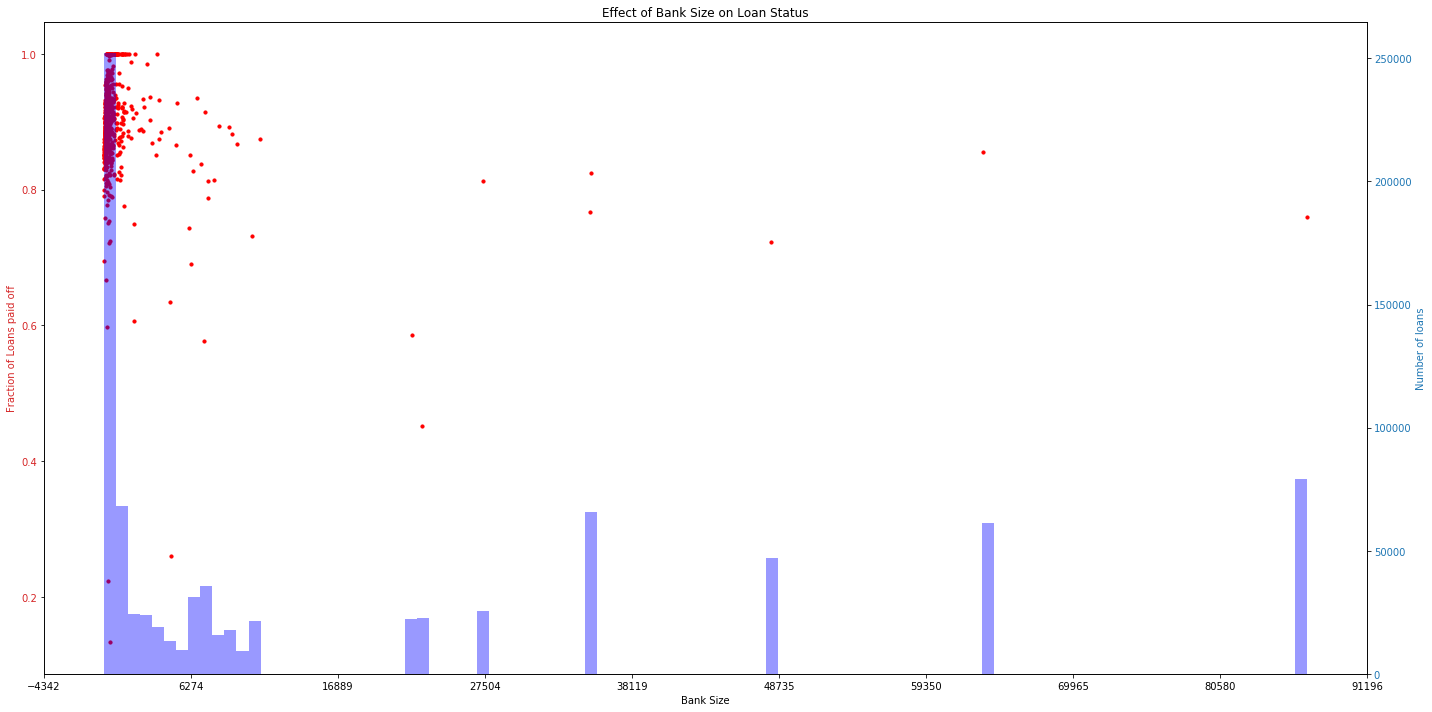

In [170]:
fig, ax1 = plt.subplots(figsize = (20, 10))

color = 'tab:red'
ax1.set_xlabel('Bank Size')
ax1.set_ylabel('Fraction of Loans paid off', color=color)
ax1.scatter(banks['Bank'], banks['Fraction_Paid'], s = 10, c = 'r')
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_locator(plt.MaxNLocator(25))
ax1.set_title("Effect of Bank Size on Loan Status")
ax1.xaxis.set_major_locator(plt.LinearLocator(numticks=10, presets=None))


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of loans', color=color)  # we already handled the x-label with ax1
sns.distplot(sba_bank['Bank_Size'], bins = 100, kde = False, color = 'b')
#sns.lineplot(x = banks['Bank'], y = banks['Count'], color = 'b')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.xaxis.set_major_locator(plt.NullLocator())

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.close()

Hmm, there's a lot of crowding at the left side of the graph for the failure rate scatterplot, and rather a vacuum on the right side of the graph where there is a single bank that's made a _lot_ of loans. Maybe if I take the log of the bank size...

In [171]:
banks['Log_Bank'] = np.log(banks['Bank'])
banks.head()

,Bank,Fraction_Paid,Count,Log_Bank
0,1.0,0.694260,906.0,0.000000
1,2.0,0.791209,1001.0,0.693147
2,3.0,0.798918,1109.0,1.098612
3,4.0,0.830492,1056.0,1.386294
4,5.0,0.851439,1077.0,1.609438


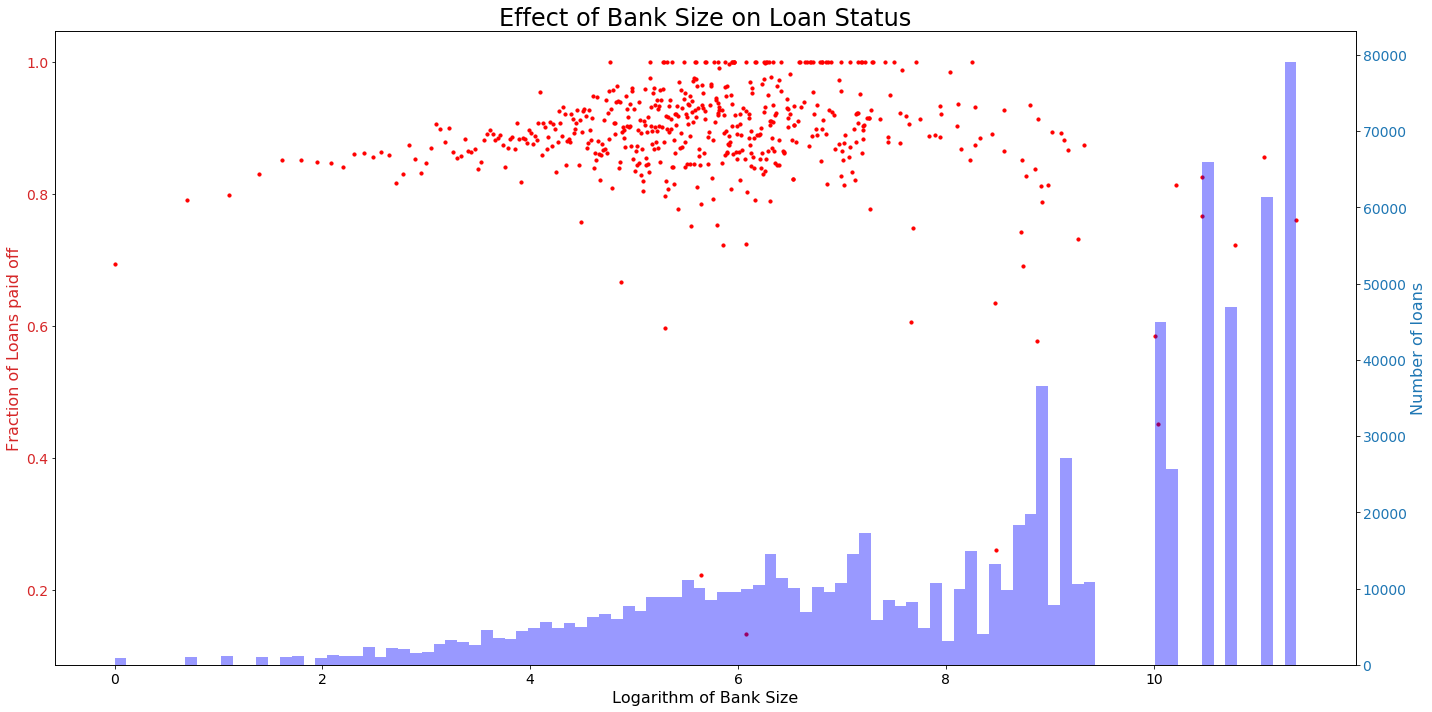

In [172]:
fig, ax1 = plt.subplots(figsize = (20, 10))

color = 'tab:red'
ax1.set_xlabel('Logarithm of Bank Size', fontsize = 16)
ax1.set_ylabel('Fraction of Loans paid off', color=color, fontsize = 16)
ax1.scatter(banks['Log_Bank'], banks['Fraction_Paid'], s = 10, c = 'r')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title("Effect of Bank Size on Loan Status", fontsize = 24)
ax1.tick_params(labelsize = 14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of loans', color=color, fontsize = 16)  # we already handled the x-label with ax1
sns.distplot(np.log(sba_bank['Bank_Size']), bins = 100, kde = False, color = 'b')
#sns.lineplot(x = banks['Log_Bank'], y = banks['Count'], color = 'b')
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(labelsize = 14)


#ax2.xaxis.set_major_locator(plt.NullLocator())

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.close()

### Term vs Loan Amount

In [173]:
sba_term = sba_cleaned[['Term', 'DisbursementGross', 'MIS_Status']]
sba_term.head()

,Term,DisbursementGross,MIS_Status
0,84,60000.0,P I F
1,60,40000.0,P I F
2,180,287000.0,P I F
3,60,35000.0,P I F
4,240,229000.0,P I F


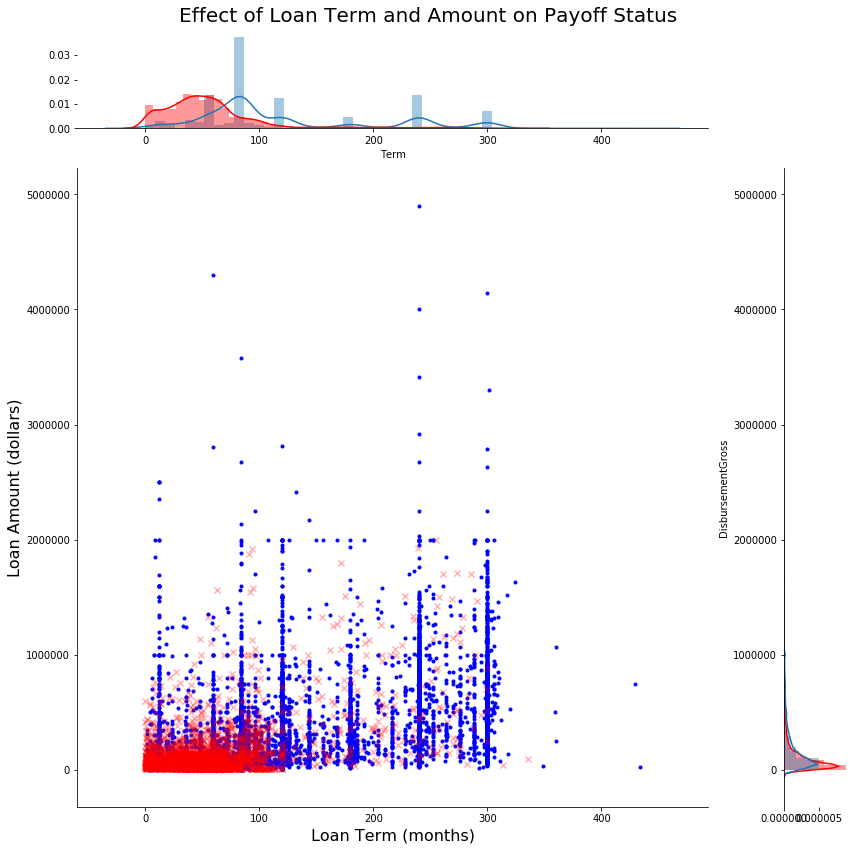

In [174]:
sampled = sba_term.sample(20000)

paid = sampled.loc[sampled['MIS_Status'] == 'P I F']
chf = sampled.loc[sampled['MIS_Status'] != 'P I F']

#df1 = pd.DataFrame({'col1': data1, 'col2':data2})
#df2 = pd.DataFrame({'col1': data3, 'col2':data4})


axs = sns.jointplot('Term', 'DisbursementGross', data=paid, height=12)
axs.ax_joint.scatter('Term', 'DisbursementGross', data=paid, c='b', marker='.')
axs.ax_joint.scatter('Term', 'DisbursementGross', data=chf, c='r', marker='x', alpha = 0.3)

# drawing pdf instead of histograms on the marginal axes
axs.ax_marg_x.cla()
axs.ax_marg_y.cla()
sns.distplot(paid['Term'], ax=axs.ax_marg_x)
sns.distplot(chf['Term'], ax = axs.ax_marg_x, color = 'r')
sns.distplot(chf['DisbursementGross'], ax=axs.ax_marg_y, vertical=True, color = 'r')
sns.distplot(paid['DisbursementGross'], ax=axs.ax_marg_y, vertical=True)

axs.set_axis_labels('Loan Term (months)', 'Loan Amount (dollars)', fontsize = 16)

axs.fig.suptitle("Effect of Loan Term and Amount on Payoff Status", fontsize = 20)
axs.ax_joint.collections[0].set_alpha(0)
axs.fig.tight_layout()
axs.fig.subplots_adjust(top=0.95) # Reduce plot to make room 

plt.show()
plt.close()